In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
# Load the data

# Get current working directory
current_dir = os.getcwd() 

# Append data/mnist.npz to the previous path to get the full path
data_path = os.path.join(current_dir, "data/mnist.npz") 

# Get only training set
(training_images, training_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data(path=data_path) 

In [3]:
def reshape_and_normalize(images):
    img =[]
    for image in images:
        # Reshape the images to add an extra dimension
        img.append(np.resize(image,(28,28,1)))
    images=np.array(img)
    # Normalize pixel values
    images = images / 255.0

    return images

In [4]:
(training_images, training_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data(path=data_path) 

training_images = reshape_and_normalize(training_images)

print(f"Maximum pixel value after normalization: {np.max(training_images)}\n")
print(f"Shape of training set after reshaping: {training_images.shape}\n")
print(f"Shape of one image after reshaping: {training_images[0].shape}")

Maximum pixel value after normalization: 1.0

Shape of training set after reshaping: (60000, 28, 28, 1)

Shape of one image after reshaping: (28, 28, 1)


In [5]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
    # Check accuracy
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.99:
                print("\nReached 99% accuracy so cancelling training!") 
                
                # Stop training once the above condition is met
                self.model.stop_training = True

In [6]:
def convolutional_model():
    model = tf.keras.models.Sequential([ 
      tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
    ]) 
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy']) 
        
    return model

In [7]:
model = convolutional_model()

callbacks = myCallback()

history = model.fit(training_images, training_labels, epochs=10,callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1440 - accuracy: 0.9582
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0487 - accuracy: 0.9848
Epoch 3/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.0307 - accuracy: 0.9900
Reached 99% accuracy so cancelling training!
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0307 - accuracy: 0.9900


In [8]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 74.4980 - accuracy: 0.9066


[74.49800872802734, 0.9065999984741211]

In [9]:
pred=model.predict(test_images)
print(pred[5])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


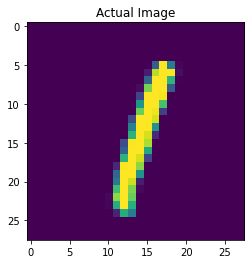

Predicted output :  1


In [10]:
plt.title("Actual Image")
plt.imshow(test_images[5], interpolation='nearest')
plt.show()
print("Predicted output : ",list(pred[5]).index(1))